In [81]:
from openai import OpenAI
import base64
from PIL import Image
import re
def filter_letters(s):
    return re.sub(r'[^a-zA-Z]', '', s)
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
client = OpenAI(api_key='YOUR_API_KEY', base_url='http://0.0.0.0:8000/v1')
model_name = client.models.list().data[0].id

In [82]:
model_name

'bzhouxyz/internvl-2d5-4B-lora-ft-tm'

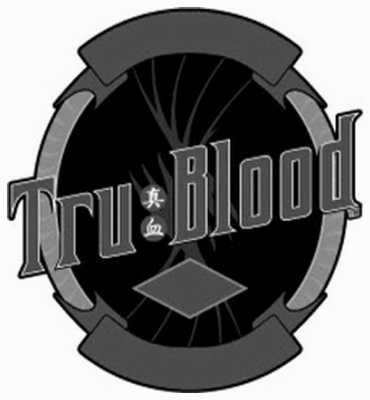

In [86]:
# Path to your image
# 素天下
# image_path = "/home/bzhou/ws/tm-query/python/dset/imgs/T1007761B_T1007761B.jpg"

# 真血
image_path = "/home/bzhou/ws/tm-query/python/dset/imgs/T1103840H_T1103840H.jpg"

# 佰达
# image_path = "/home/bzhou/ws/tm-query/python/dset/imgs/T1318337E_T1318337E.jpg"

# image_path = "/home/bzhou/ws/tm-query/python/dset/imgs/T1116311C_T1116311C.jpg"

# image_path = "/home/bzhou/ws/tm-query/python/dset/imgs/T1014450F_T1014450F.jpg"
# image_path = "/home/bzhou/ws/tm-query/python/dset/imgs/40201725536R_0795da84-9e44-4c63-843f-9d6121cedf83.jpg"

# Getting the Base64 string
base64_image = encode_image(image_path)
Image.open(image_path)

In [87]:
guide = {
    'type': 'object',
    'properties': {
        'wordsInMark': {'type': 'string'},
        'chineseCharacter': {'type': 'string'},
        'descrOfDevice': {'type': 'string'}
    },
    'required': ['wordsInMark', 'chineseCharacter', 'descrOfDevice']
}
response_format=dict(type='json_schema',  json_schema=dict(name='test',schema=guide))

In [88]:
response = client.chat.completions.create(
    model=model_name,
    messages=[
        {
            'role': 'system',
            'content': 'You are a helpful assistant that extracts Chinese characters, English words on this trademark image, and describes the trademark in short words.'
        },
        {
            'role': 'user',
            'content': [
                {
                    'type': 'text',
                    'text': '<image>\nExtract Chinese characters, English words on this trademark image, and describe the trademark in short words.',
                },
                {
                    'type': 'image_url',
                    'image_url': { 'url': f"data:image/jpeg;base64,{base64_image}"},
                },
            ],
        }
    ],
    response_format=response_format,
    temperature=0.1,
    top_p=0.9)

print(response.choices[0].message.content)

{"wordsInMark": "tru blood", "chineseCharacter": "真血", "descrOfDevice": "ring diamond"}


In [ ]:
response = client.chat.completions.create(
    model=model_name,
    messages=[{
        'role':
        'user',
        'content': [{
            'type': 'text',
            'text': 'Extract all readable text from the provided image while preserving formatting, punctuation, and line breaks as accurately as possible.',
        }, {
            'type': 'image_url',
            'image_url': {
                'url':
                f"data:image/jpeg;base64,{base64_image}",
            },
        }],
    }],
    temperature=0.8,
    top_p=0.8)
answer = response.choices[0].message.content.lower()
print(answer)

internal error happened


In [4]:
response = client.chat.completions.create(
    model=model_name,
    messages=[{
        'role':
        'user',
        'content': [{
            'type': 'text',
            'text': 'convert this text to simplified chinese: 澳寳牌',
        }],
    }],
    temperature=0.8,
    top_p=0.8)

print(response.choices[0].message.content)

澳宝牌


In [30]:
response = client.chat.completions.create(
    model=model_name,
    messages=[{
        'role':
        'user',
        'content': [{
            'type': 'text',
            'text': 'is there any 汉字 in this logo, answer in yes or no',
        }, {
            'type': 'image_url',
            'image_url': {
                'url':
                f"data:image/jpeg;base64,{base64_image}",
            },
        }],
    }],
    temperature=0.8,
    top_p=0.8)
answer = response.choices[0].message.content.lower()
answer = filter_letters(answer)
print(answer)
if answer == 'yes':
    response = client.chat.completions.create(
    model=model_name,
    messages=[{
        'role':
        'user',
        'content': [{
            'type': 'text',
            'text': 'what chinese chars in this image, answer only text extracted',
        }, {
            'type': 'image_url',
            'image_url': {
                'url':
                f"data:image/jpeg;base64,{base64_image}",
            },
        }],
    }],
    temperature=0.8,
    top_p=0.8)
    print(response.choices[0].message.content)

no


In [31]:
response = client.chat.completions.create(
    model=model_name,
    messages=[{
        'role':
        'user',
        'content': [{
            'type': 'text',
            'text': 'is there any english in this logo, answer in yes or no',
        }, {
            'type': 'image_url',
            'image_url': {
                'url':
                f"data:image/jpeg;base64,{base64_image}",
            },
        }],
    }],
    temperature=0.8,
    top_p=0.8)
answer = response.choices[0].message.content.lower()
answer = filter_letters(answer)
print(answer)
if answer == 'yes':
    response = client.chat.completions.create(
    model=model_name,
    messages=[{
        'role':
        'user',
        'content': [{
            'type': 'text',
            'text': 'extract all english on this image, answer only text extracted',
        }, {
            'type': 'image_url',
            'image_url': {
                'url':
                f"data:image/jpeg;base64,{base64_image}",
            },
        }],
    }],
    temperature=0.8,
    top_p=0.8)
    print(response.choices[0].message.content)

yes
CHECK THE LABEL


In [32]:
response = client.chat.completions.create(
    model=model_name,
    messages=[{
        'role':
        'user',
        'content': [{
            'type': 'text',
            'text': 'describe this logo in less than 3 words',
        }, {
            'type': 'image_url',
            'image_url': {
                'url':
                f"data:image/jpeg;base64,{base64_image}",
            },
        }],
    }],
    temperature=0.8,
    top_p=0.8)
response.choices[0].message.content

'Check label text.'

'BTGPactual 佰达'